<a href="https://colab.research.google.com/github/yanann11/nebius_llm_course/blob/main/BrokenTelephone_Client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import matplotlib.pyplot as plt
import base64
from PIL import Image
from io import BytesIO

def call_broken_telephone(server_url, starting_prompt, n_rounds=3):
    # Prepare the request
    data = {
        'starting_prompt': starting_prompt,
        'n_rounds': n_rounds
    }

    # Make the request
    response = requests.post(f'{server_url}/play', json=data)
    response.raise_for_status()

    # Process the response
    result = response.json()

    if result.get('error'):
        raise Exception(result['error'])

    # Visualize the results
    history = result['history']

    for i, round_data in enumerate(history):
        # Print description
        print(f"\n{'='*80}")
        print(f"Round {i+1}")
        print(f"{'='*80}")
        print(f"Description: {round_data['description']}")
        print(f"{'='*80}")

        # Display image
        img_data = base64.b64decode(round_data['image'])
        img = Image.open(BytesIO(img_data))

        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Round {i+1} Image')
        plt.show()
        plt.close()


Round 1
Description: The image depicts a ginger cat with white markings on its chest and paws, sitting on a windowsill. The cat is holding a classical acoustic guitar with its front paws, as if it is playing it. The guitar is brown with a black fretboard and six tuning pegs at the top. The windowsill is covered with a maroon or dark red fabric, and there is a curtain to the left side of the window. The window itself has a grid design with multiple small panes, and the light coming through the window creates a warm, cozy atmosphere. The overall scene is whimsical and charming, blending a realistic setting with a playful and imaginative twist.


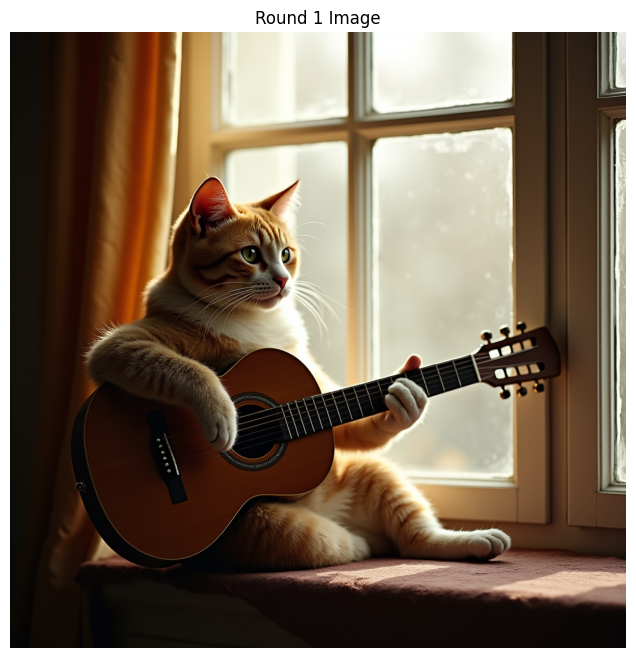


Round 2
Description: The image depicts a charming scene where a fluffy, orange and white cat is sitting on a windowsill, playing a small acoustic guitar. The cat has a serious expression on its face, as if deeply focused on its music. The guitar is positioned in the cat's front paws, and the cat appears to be strumming the strings. The windowsill is bathed in soft, natural light coming from the window behind the cat, which adds a warm and cozy atmosphere to the scene. To the left of the cat, there is a red curtain, further enhancing the homely feel of the image. The overall composition is whimsical and endearing, capturing a delightful moment of a cat seemingly engaged in a musical performance.


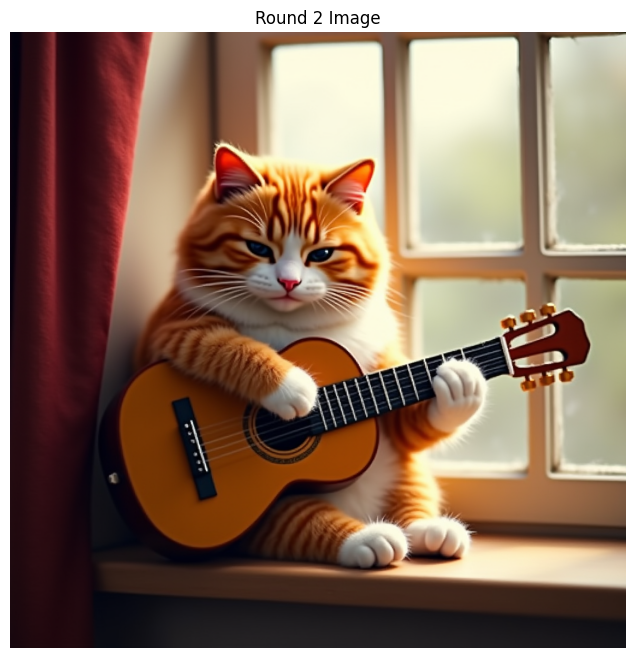


Round 3
Description: The image depicts a cute, orange and white cat sitting on a windowsill. The cat is holding a small, brown acoustic guitar and appears to be playing it. The cat has a fluffy coat with distinct orange stripes and a white chest. The background shows a window with sunlight streaming in, creating a warm and cozy atmosphere. The window has a red curtain on the left side. The overall scene is charming and whimsical, combining elements of music and a cozy setting.


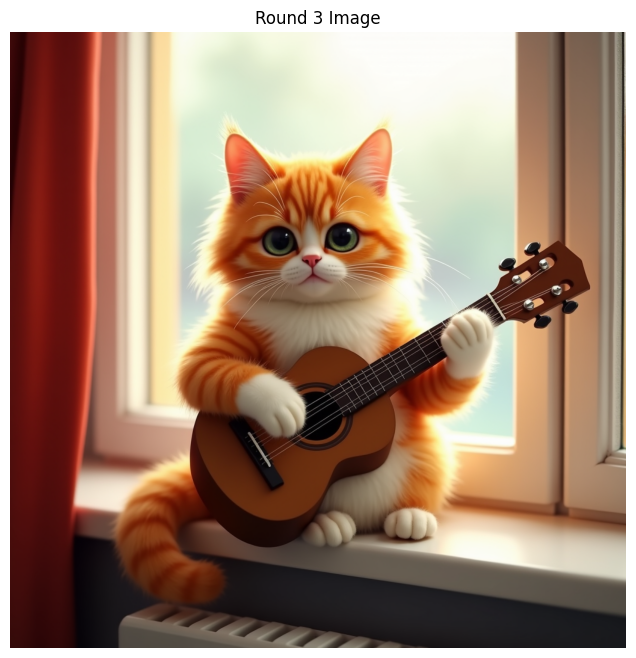


Round 4
Description: The image depicts a charming and whimsical scene featuring a cartoonish orange and white cat playing a small acoustic guitar. The cat is perched on a windowsill, bathed in soft, warm light that suggests a serene and peaceful atmosphere. The cat has a fluffy appearance, with a mix of orange stripes and white patches on its fur. It has large, expressive eyes and a content expression on its face, adding to the overall delightful and heartwarming feel of the image.

The background is blurred, but it appears to be a bright, sunny day outside the window, with a hint of greenery and a clear sky. To the left of the cat, there is a partially drawn red curtain, and to the right, there is a small potted plant with green, spiky leaves, likely a cactus or succulent. The windowsill itself is plain, providing a clean and simple platform for the cat and its guitar.

The overall composition of the image is balanced and harmonious, with the cat and its guitar as the central focus, 

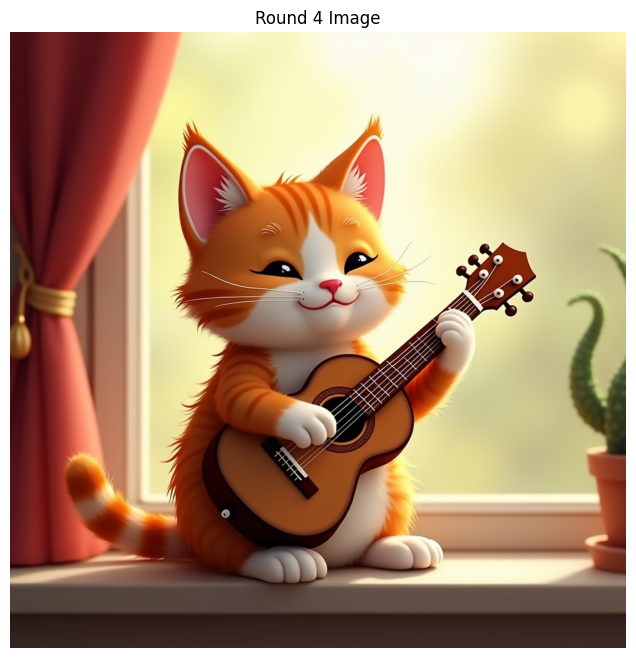

In [4]:
server_url = "https://caaf-35-245-121-246.ngrok-free.app"  # Replace with the URL from the first notebook
starting_prompt = "A cat seats on near the window and plays guitar"
call_broken_telephone(server_url, starting_prompt, n_rounds=4)